In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nx = 64
Ny = 1
Nz = 64
case = 'output_swe_vortex'
# case = 'output_swe_dvortex'
dvortex = 'dvortex' in case
if dvortex:
    et = 72.0 * 3.0 #* 1200.0
else:
    et = 0.5

def load(Nx,Ny,et):
    base_fn = case
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

0.0
ic rho:  1.0 0.99670607 0.0032939315
ic p2_nodes:  2.2147233 2.2074282 0.0072951317
after_swe_to_lake rho:  0.99670607 0.99670607 0.0
after_swe_to_lake p2_nodes:  0.007295207 1.7058726e-18 0.007295207
after_lake_time_step rho:  0.99670607 0.99670607 0.0
after_lake_time_step p2_nodes:  0.0009978447 -0.0063805142 0.007378359
after_lake_to_swe rho:  1.0004458 0.9971199 0.0033259392
after_lake_to_swe p2_nodes:  2.2157214 2.208343 0.00737834
1.0
after_full_step rho:  1.0004406 0.9971223 0.0033183098
after_full_step p2_nodes:  2.2157052 2.208349 0.007356167
2.0
after_full_step rho:  1.000427 0.9971234 0.0033035874
after_full_step p2_nodes:  2.2156715 2.208349 0.00732255


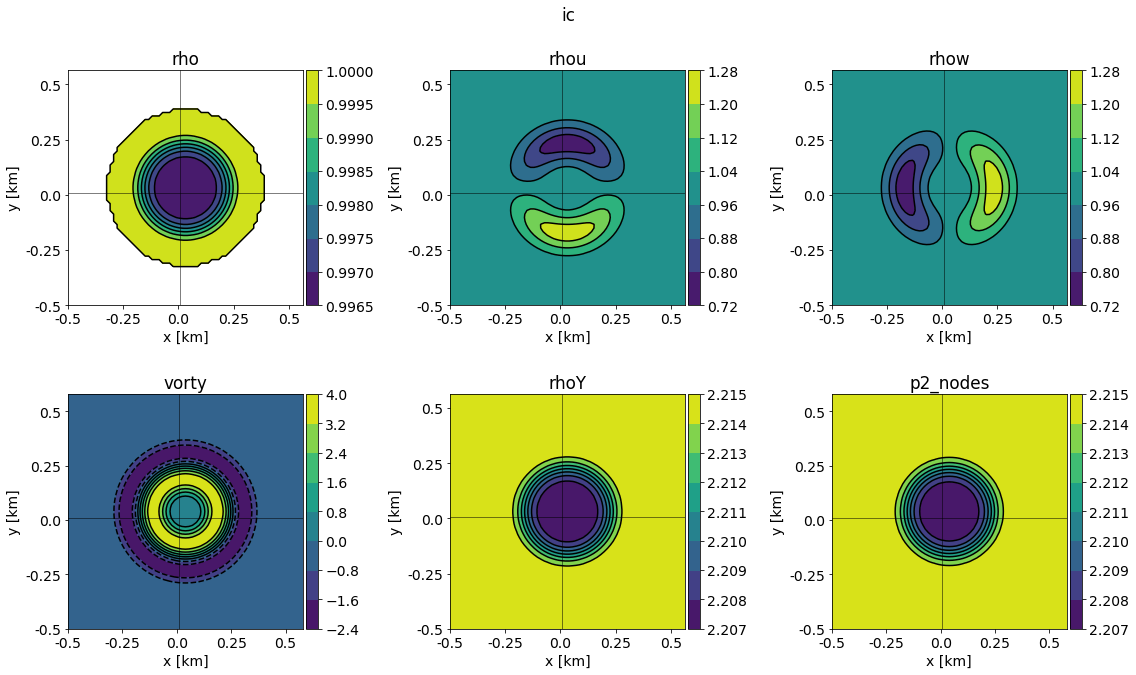

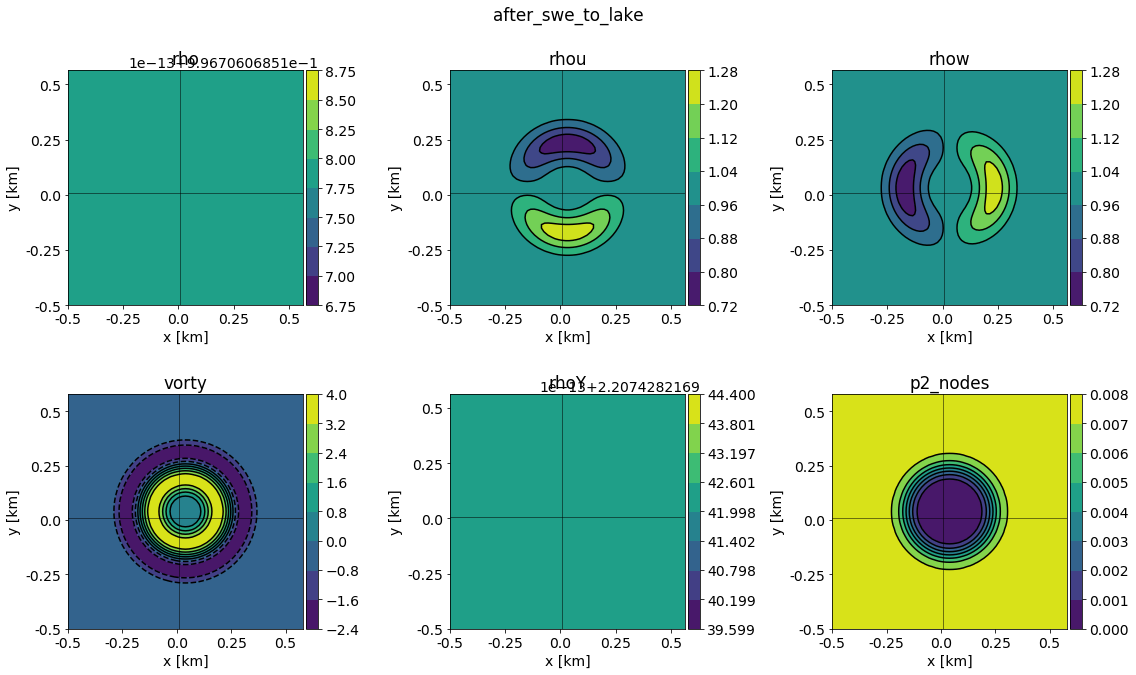

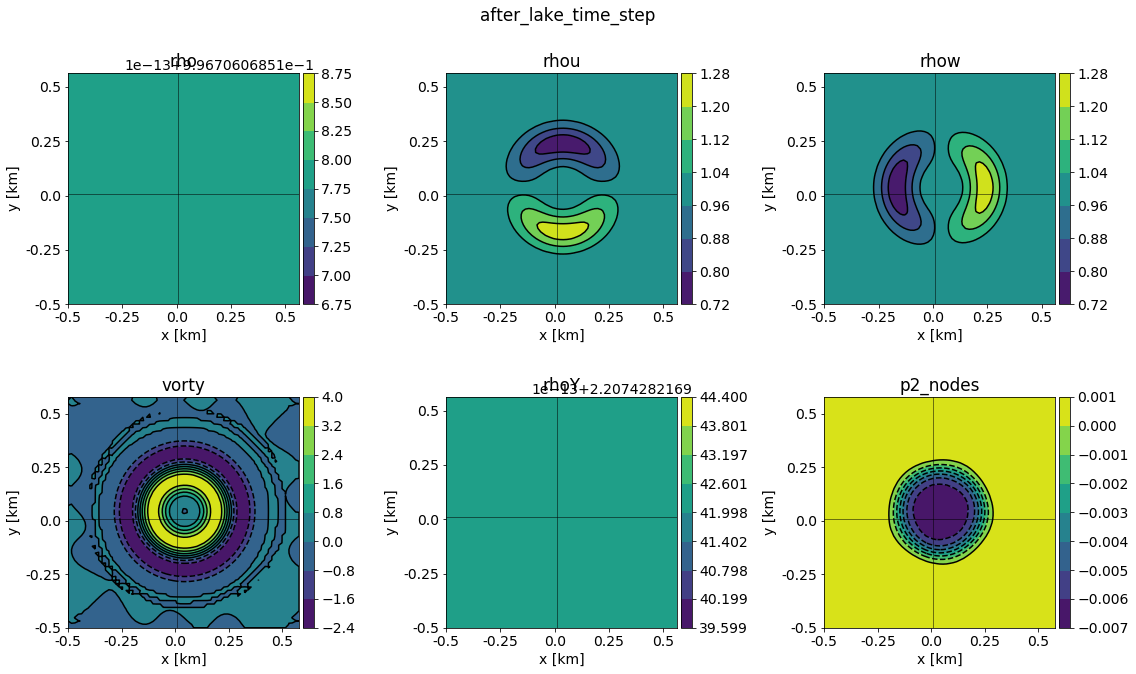

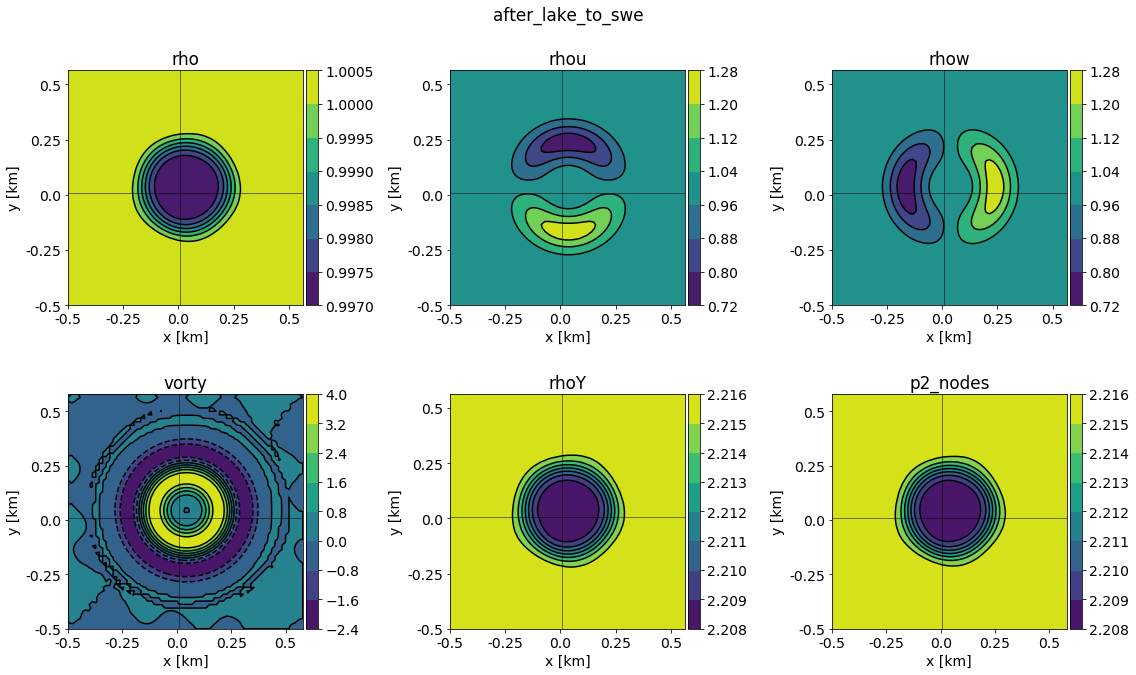

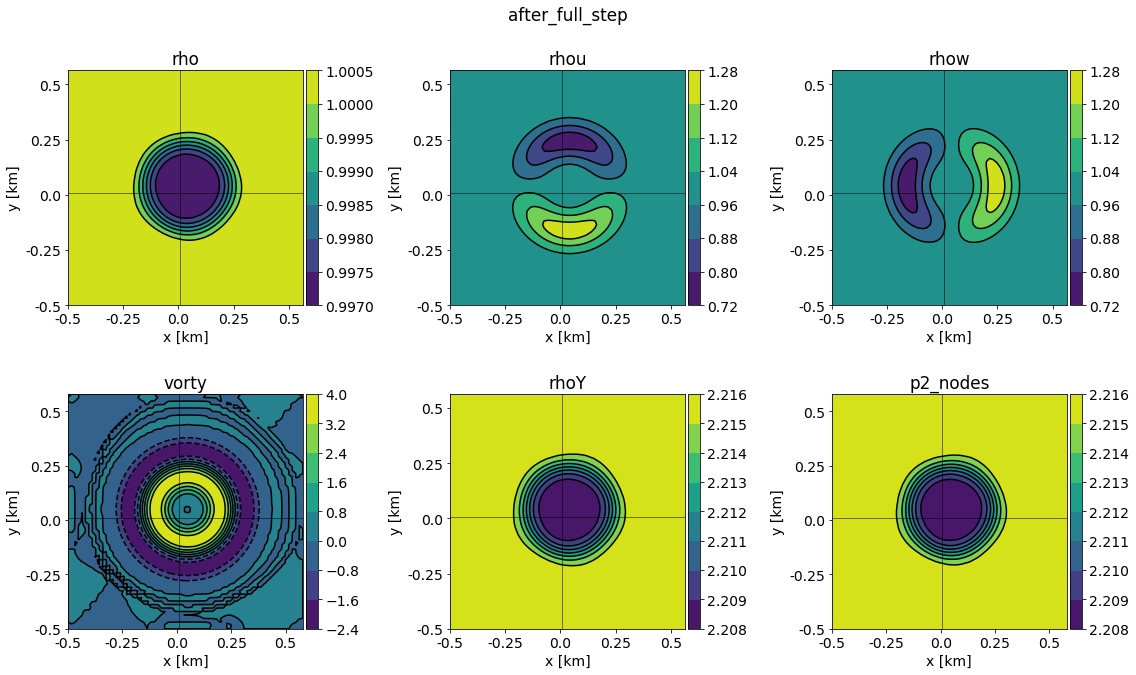

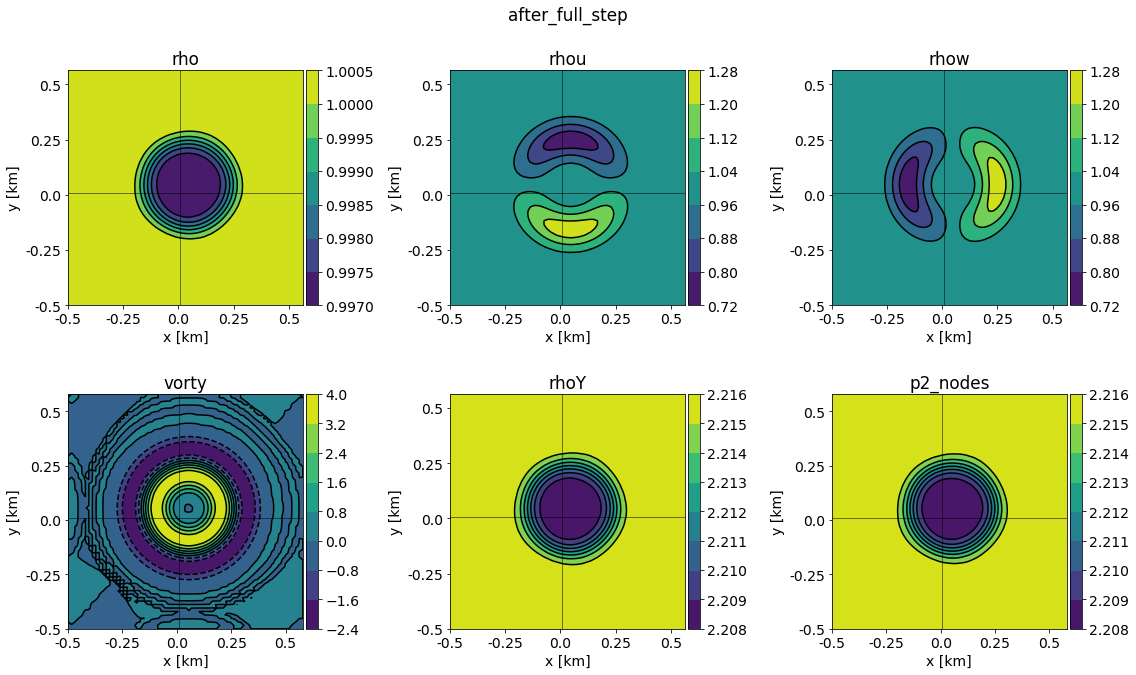

In [222]:
comp_sfx = 'comp_1.0_pp_tra_truth'
comp_sfx = 'comp_1.0_pp_tra_debug_ib'
# comp_sfx = 'psinc_1.0_pp_tra_truth'
# comp_sfx = 'psinc_debug'
# comp_sfx = 'comp_debug_ib'
# comp_sfx = 'noda_pp_psinc'
# comp_sfx = tc.cb_suffix(2,0, '%s' %(comp_sfx))
#54.0 -- 64.5

N = 1
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['p2_nodes']
# attributes = ['after_swe_to_lake', 'after_lake_to_swe']
t_lbl = 'TIME'
t_lbl = 'WINDOW_STEP'
slc = 2

if dvortex:
    times = np.array([0.0,1.0,2.0]) #* 1200.0
#     times = np.arange(0.0,11.0)
#     times = np.array([0.0,1.5,3.0]) * 72.0
else:
#     times = [0.0,0.25,0.50]
    times = [0.0,1.0,2.0]

class oo(object): pass
if 'comp' in comp_sfx:
    oo_comp = oo()
else:
    oo_pi = oo()
            
for tt,time in enumerate(times):
    print(time)
    if tt == 0:
        tag_list = ['ic','after_swe_to_lake','after_lake_time_step','after_lake_to_swe']
#         tag_list = ['ic']
    else:
        tag_list = [tags[9]]
    for tag in tag_list:
        arr_lst = []
        for atr_idx, attribute in enumerate(attributes):
            arr = tc.get_arr(path,time, N, attribute, label_type=t_lbl, tag=tag, inner=False, avg=False)[0][:,slc,:]
            arr = arr.T
    #         if 'psinc' in comp_sfx:
    #             arr_next = tc.get_arr(path,time+0.01, N, attribute, label_type=t_lbl, tag=tag, inner=False, avg=False)[0][:,slc,:]
    #             arr_next = arr_next.T
    #             arr = 0.5*(arr + arr_next)

            if attribute == 'p2_nodes' or attribute == 'rho':
                print("%s %s: " %(tag,attribute), arr.max(), arr.min(), arr.max() - arr.min())
                arr_lst.append([arr, '%s' %attribute])
            else:
                arr_lst.append([arr,attribute])



            if 'comp' in comp_sfx:
    #             print("comp:" ,comp_sfx)
                setattr(oo_comp,attribute,arr)
            else:
    #             print("pi", comp_sfx)
                setattr(oo_pi,attribute,arr)        

            arr = [arr,attribute]

        pl = pt.plotter(arr_lst,ncols=3,figsize=(16,10),sharey=False)
        x_axs = [-0.5,-0.25,0.0,0.25,0.5]
        y_axs = [-0.5,-0.25,0.0,0.25,0.5]
        x_loc = np.linspace(0,Nx-1,5)
        y_loc = np.linspace(0,Nz-1,5)
        x_label = r'x [km]'
        y_label = r'y [km]'

        pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
        _ = pl.plot(aspect='equal',method='contour',suptitle=tag)